In [48]:
import numpy as np
from matplotlib import pyplot as plt

$$ \begin{align*}
F_{\text{circ}}^{\text{sc}} = \frac{E_\text{circ}}{E_\text{inc}} &= \frac{t_\text{im}}{1-r_\text{im}r_\text{em}e^{-i\phi}} \\
F_{\text{refl}}^{\text{sc}} = \frac{E_\text{refl}}{E_\text{inc}} &= \frac{r_\text{im}-r_\text{em} e^{-i\phi}}{1-r_\text{im}r_\text{em}e^{-i\phi}} \\
F_{\text{trans}}^{\text{sc}} = \frac{E_\text{trans}}{E_\text{inc}} &= \frac{t_\text{im}t_\text{em} e^{-i\phi/2}}{1-r_\text{im}r_\text{em}e^{-i\phi}}
\end{align*}$$

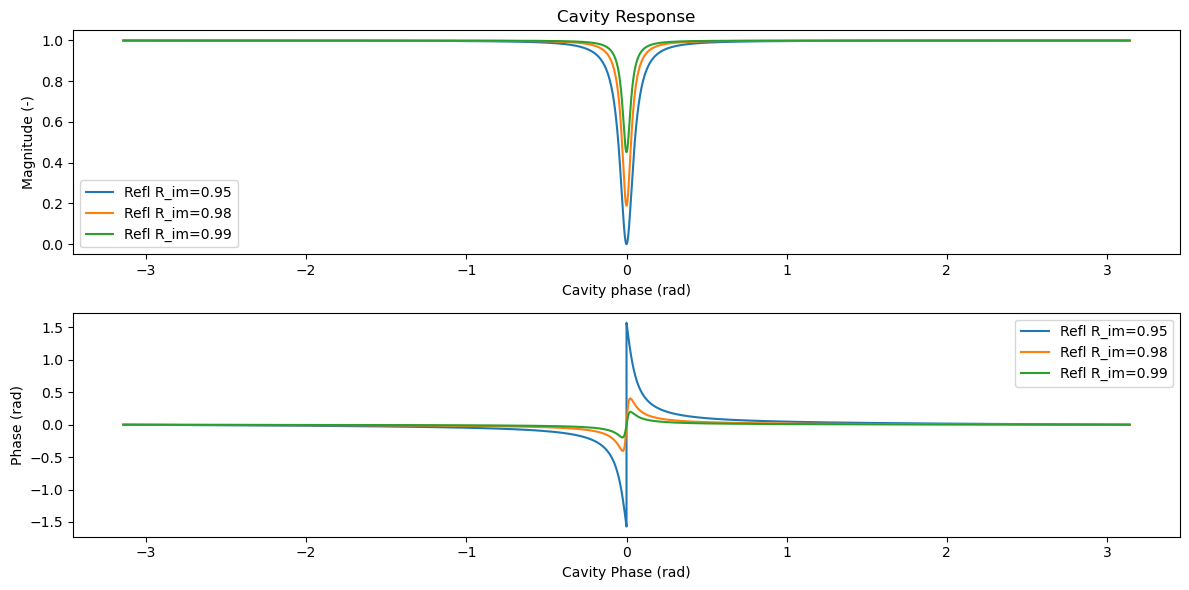

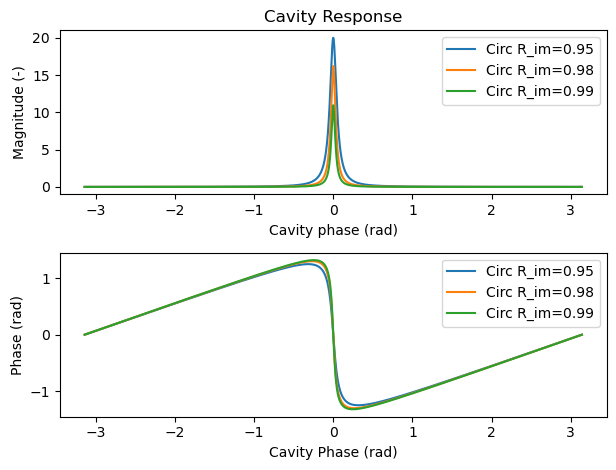

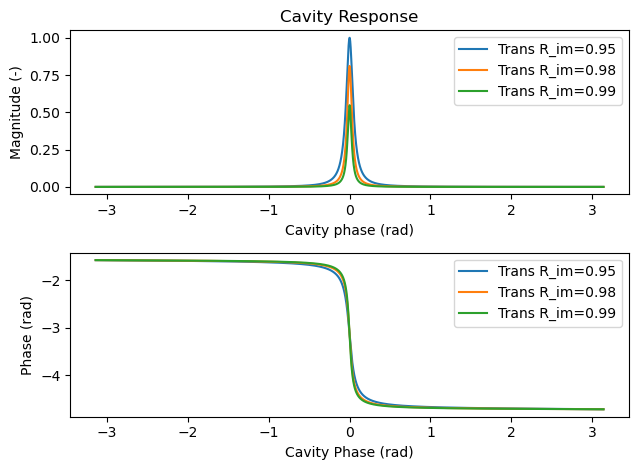

In [58]:
# Define parameters
R_im = [0.95, 0.98, 0.99]  # Power reflectivities
R_em = [0.99, 0.98, 0.95]  # Power reflectivities

r_im = np.sqrt(R_im)       # electric field reflectivities
r_em = np.sqrt(R_em)

t_im_list = [np.sqrt(1 - R) for R in R_im]   # input mirror transmisson, zero loss
t_em_list = [np.sqrt(1 - R) for R in R_em]

phi_range = np.linspace(-np.pi,np.pi, 100000)

# def phi_to_freq(phi):
#     wave = 4 * np.pi * L/phi
#     return wave_to_freq(wave)

# new_freq_range = phi_to_freq(phi_range)

# Initialize arrays to store results
F_circ_mag = np.zeros((len(R_im), len(phi_range)))
F_circ_phase = np.zeros((len(R_im), len(phi_range)))

F_refl_mag = np.zeros((len(R_im), len(phi_range)))
F_refl_phase = np.zeros((len(R_im), len(phi_range)))

F_trans_mag = np.zeros((len(R_im), len(phi_range)))
F_trans_phase = np.zeros((len(R_im), len(phi_range)))

# Calculate transfer functions
# Setting R_em to 0.98
l = k # index for R_em value
for k in range(len(R_im)):
    E_inc = (1 - r_im[k] * r_em[l] * np.exp(-1j * phi_range))
    
    F_circ = t_im_list[k] / E_inc
    F_refl = (r_im[k] - r_em[l] * np.exp(-1j * phi_range)) / E_inc
    F_trans = -(t_im_list[k] * t_em_list[l] * np.exp(-1j * phi_range / 2)) / E_inc

    # Calculate magnitude and phase
    F_circ_mag[k] = np.real(F_circ * np.conjugate(F_circ))
    F_circ_phase[k] = (np.angle(F_circ, deg=False))

    F_refl_mag[k] = np.real(F_refl * np.conjugate(F_refl))
    F_refl_phase[k] = (np.angle(F_refl, deg=False))

    F_trans_mag[k] = np.real(F_trans * np.conjugate(F_trans))
    F_trans_phase[k] = (np.angle(F_trans, deg=False))

# Plot results
plt.figure(figsize=(12, 6))

# Magnitude plot
def plot_TF(data_mag, data_phase, label):
    plt.subplot(2, 1, 1)
    for k in range(len(R_im)):
        plt.plot(phi_range, data_mag[k], label=f'{label} R_im={R_im[k]}')

        plt.title('Cavity Response')
        plt.xlabel('Cavity phase (rad)')
        plt.ylabel('Magnitude (-)')
        
        # plt.xlim(-0.5,0.5)
        plt.legend()

    # Phase plot
    plt.subplot(2, 1, 2)
    for k in range(len(R_im)):
        plt.plot(phi_range, np.unwrap(data_phase[k]), label=f'{label} R_im={R_im[k]}')

        #plt.title('Phase Bode Plot')
        plt.xlabel('Cavity Phase (rad)')
        plt.ylabel('Phase (rad)')
        # plt.xlim(-0.5,0.5)
        plt.legend()

plot_TF(F_refl_mag, F_refl_phase, "Refl")
plt.tight_layout()
plt.show()

plot_TF(F_circ_mag, F_circ_phase, "Circ")
plt.tight_layout()
plt.show()

plot_TF(F_trans_mag, F_trans_phase, "Trans")
plt.tight_layout()
plt.show()

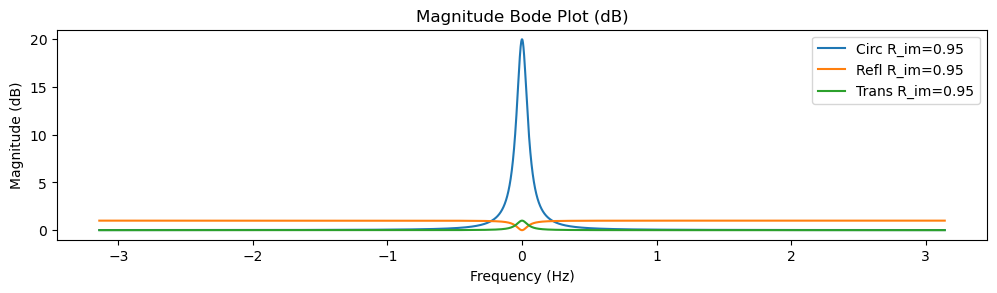

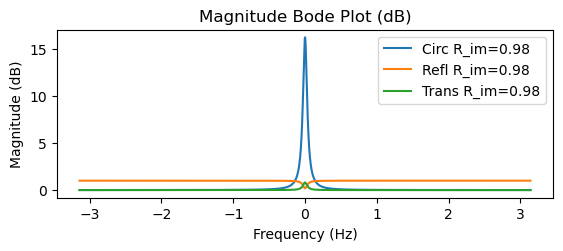

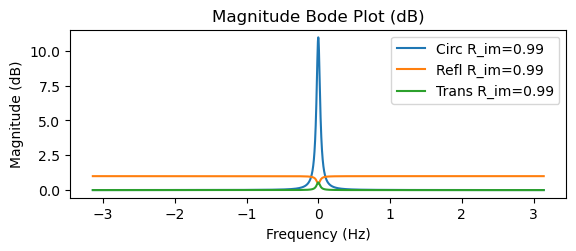

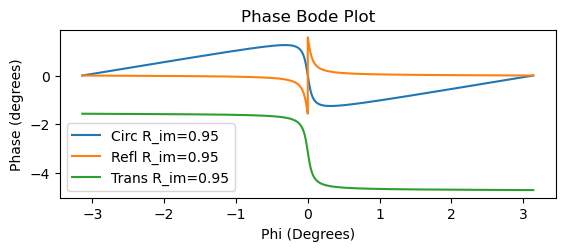

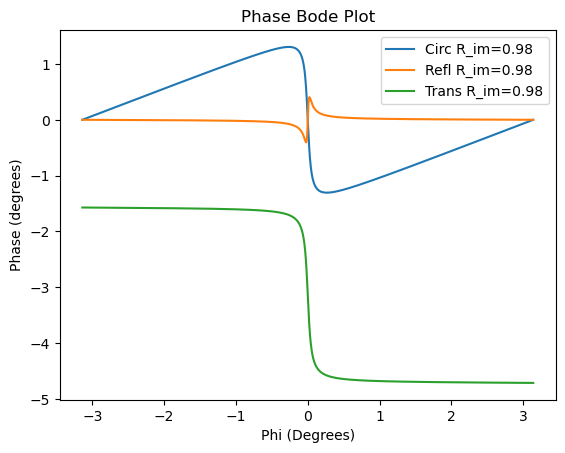

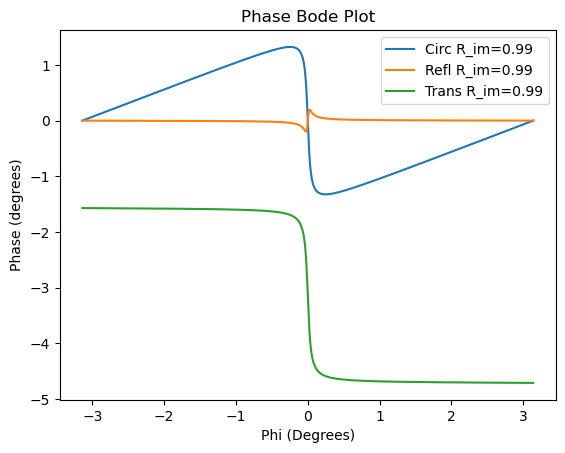

In [54]:
# Plot results
plt.figure(figsize=(12, 6))

# Magnitude plot

for k in range(len(R_im)):
    plt.subplot(2, 1, 1)
    plt.plot(phi_range, F_circ_mag[k], label=f'Circ R_im={R_im[k]}')
    plt.plot(phi_range, F_refl_mag[k], label=f'Refl R_im={R_im[k]}')
    plt.plot(phi_range, F_trans_mag[k], label=f'Trans R_im={R_im[k]}')
    plt.title('Magnitude Bode Plot (dB)')
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('Magnitude (dB)')
    plt.legend()
    plt.show()

# Phase plot
plt.subplot(2, 1, 2)
for k in range(len(R_im)):
    plt.plot(phi_range, F_circ_phase[k], label=f'Circ R_im={R_im[k]}')
    plt.plot(phi_range, F_refl_phase[k], label=f'Refl R_im={R_im[k]}')
    plt.plot(phi_range, F_trans_phase[k], label=f'Trans R_im={R_im[k]}')
    plt.title('Phase Bode Plot')
    plt.xlabel('Phi (Degrees)')
    plt.ylabel('Phase (degrees)')
    plt.legend()
    plt.show()

# plt.tight_layout()
plt.show()

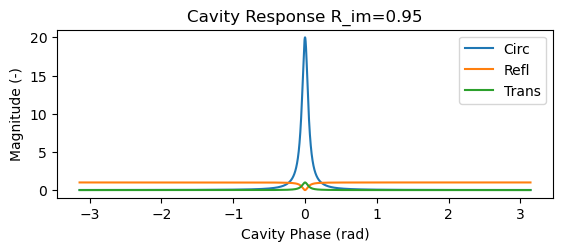

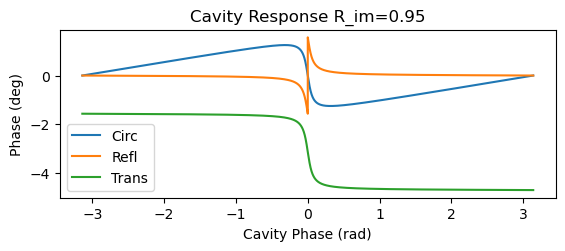

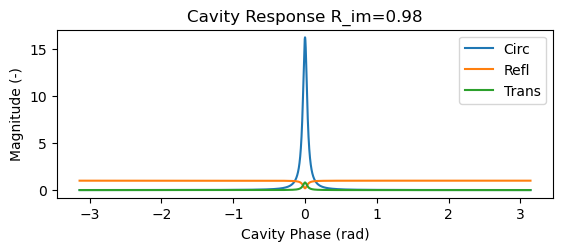

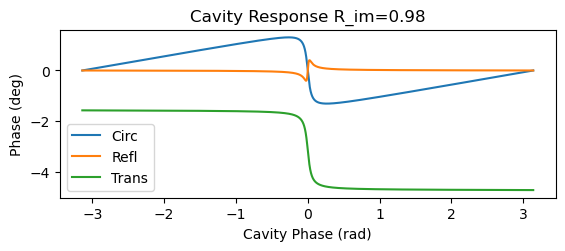

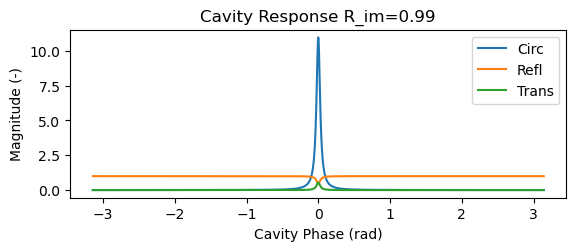

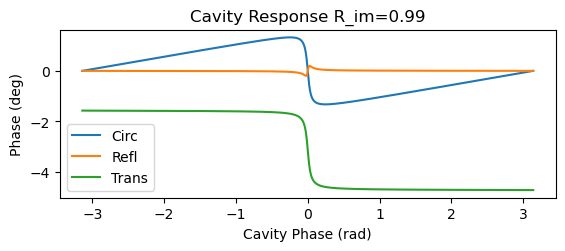

In [51]:

def plot_TF_compare(k):
    plt.subplot(2, 1, 1)
    plt.plot(phi_range, F_circ_mag[k], label=f'Circ')
    plt.plot(phi_range, F_refl_mag[k], label=f'Refl')
    plt.plot(phi_range, F_trans_mag[k], label=f'Trans')
    plt.title(f'Cavity Response R_im={R_im[k]}')
    plt.xlabel('Cavity Phase (rad)')
    plt.ylabel('Magnitude (-)')
    plt.legend()
    plt.show()

    plt.subplot(2, 1, 2)
    plt.plot(phi_range, F_circ_phase[k], label=f'Circ')
    plt.plot(phi_range, F_refl_phase[k], label=f'Refl')
    plt.plot(phi_range, F_trans_phase[k], label=f'Trans')
    plt.title(f'Cavity Response R_im={R_im[k]}')
    plt.xlabel('Cavity Phase (rad)')
    plt.ylabel('Phase (deg)')
    plt.legend()
    plt.show()
    
    # plt.tight_layout()
    plt.show()

plot_TF_compare(0)
plot_TF_compare(1)
plot_TF_compare(2)

In [52]:
# Find the minimum of the Bode magnitude plot
min_magnitude = np.min(F_circ_mag)
min_index = np.unravel_index(np.argmin(F_circ_mag), F_circ_mag.shape)
min_frequency = phi_range[min_index[1]]

print("Minimum magnitude:", min_magnitude)
print("Frequency at minimum magnitude:", min_frequency/1e6)

Minimum magnitude: 0.002577261409918498
Frequency at minimum magnitude: -3.1415926535897933e-06
